**This dataset contains information about contains diagnoses of heart disease patients. Machine learning model is needed in order to determine whether a person has heart disease or not.**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
sns.set_palette('dark')


In [2]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31


The output shows that we have around 319795 entries with 18 columns. No null values, and we have 14 numeric features, and 4 categorial features. We can convert the string attributes that has only two possibilities of unique values, but first let's make sure that there is no abnormal values.

In [4]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

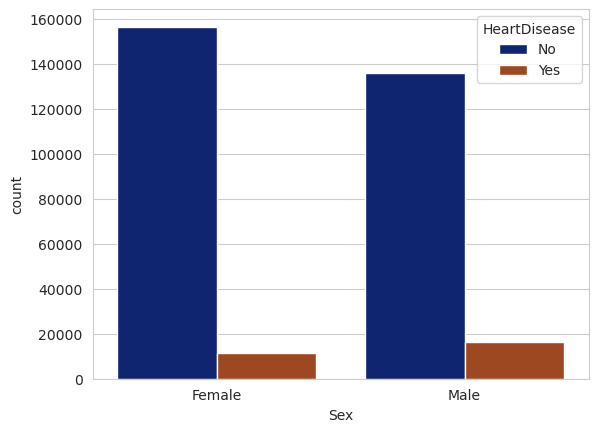

In [5]:
sns.countplot(x=df["Sex"],hue=df["HeartDisease"])

In [6]:
sex=df["Sex"].value_counts()
sex

Female    167805
Male      151990
Name: Sex, dtype: int64

[]

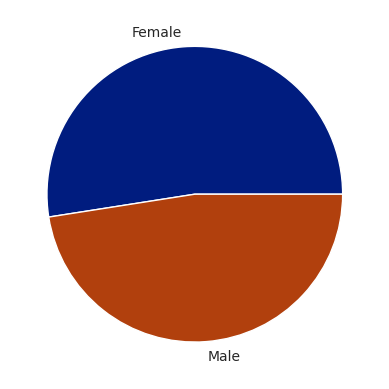

In [7]:
plt.pie(labels=sex.index,x=sex.values)
plt.plot()

In [8]:
disease_sex=df.groupby(["Sex","HeartDisease"]).size().unstack()
disease_sex

HeartDisease,No,Yes
Sex,,
Female,156571,11234
Male,135851,16139


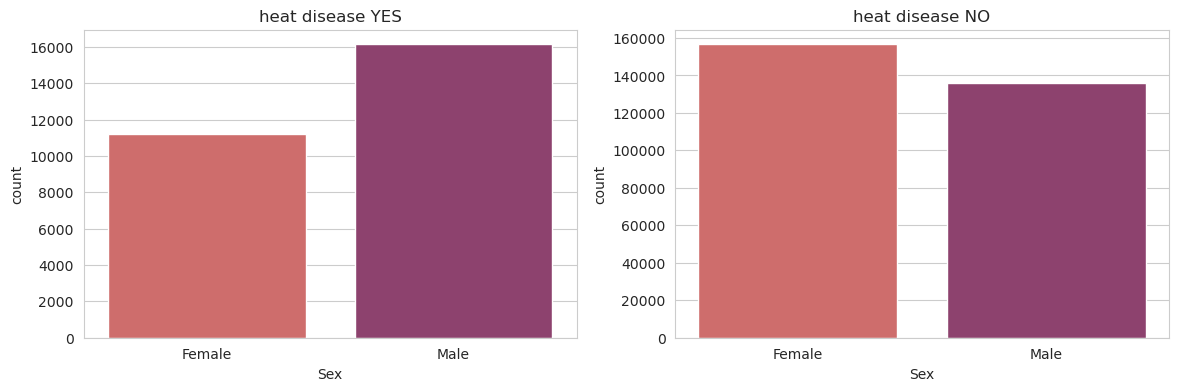

In [9]:
def plot(feature,color="mako"):
    fig,axes=plt.subplots(1,2,figsize=(14,4))

    sns.countplot(x=df[df["HeartDisease"]=="Yes"][feature],ax=axes[0],palette=color)
    axes[0].title.set_text("heat disease YES")
    sns.countplot(x=df[df["HeartDisease"]=="No"][feature],ax=axes[1],palette=color)
    axes[1].title.set_text("heat disease NO")
    plt.plot()
plot("Sex","flare")

In [10]:
df2=df.copy()

In [11]:
df2=df2.replace({"Female":0,"Male":1,'Yes':1, 'No':0,"Yes (during pregnancy)":1,"No, borderline diabetes":0})

In [12]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [14]:
df["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [15]:
df["Race"].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [16]:
df["GenHealth"].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

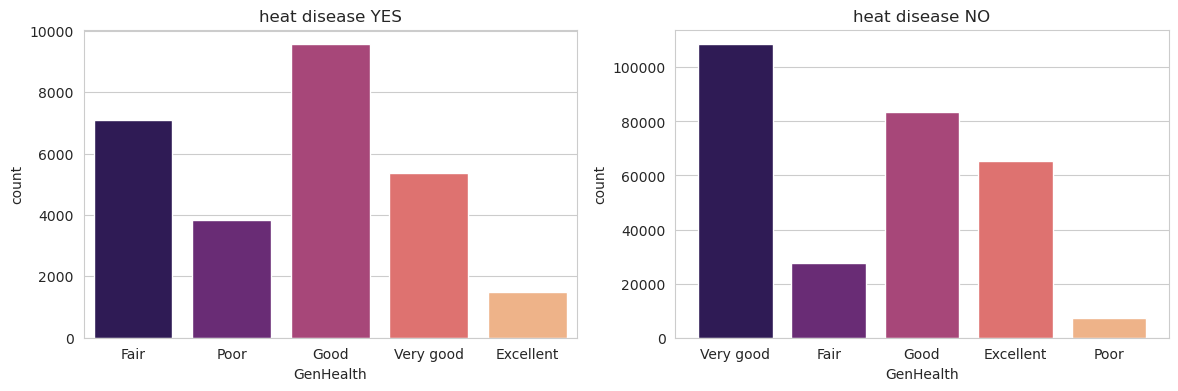

In [17]:
plot("GenHealth","magma")

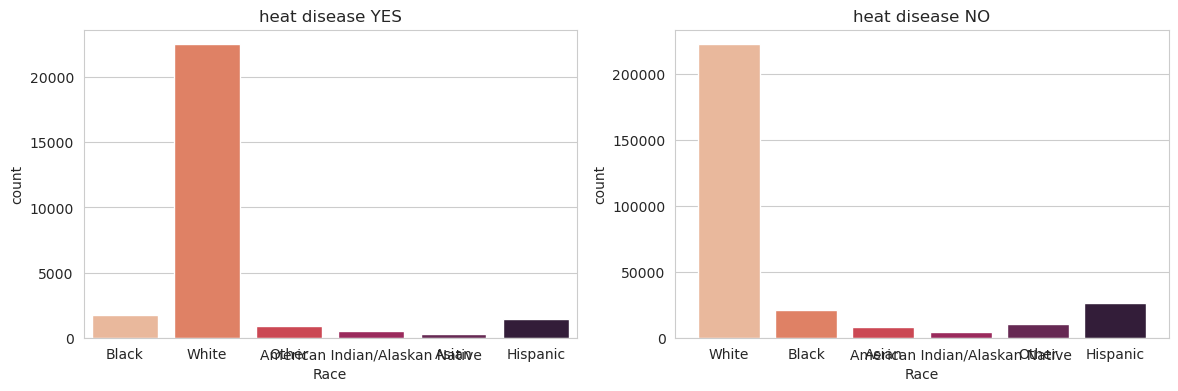

In [18]:
plot("Race","rocket_r")

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

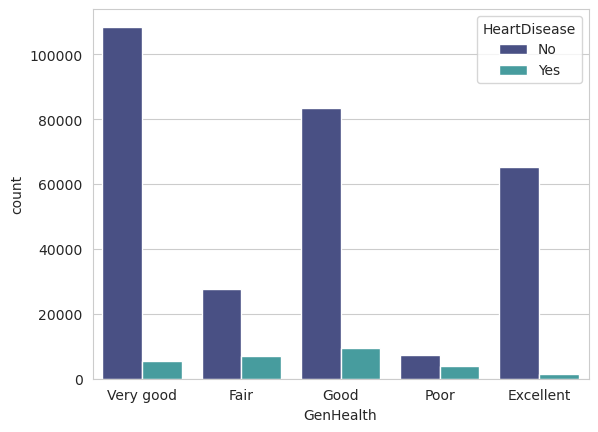

In [19]:
sns.countplot(x=df["GenHealth"],hue=df["HeartDisease"],palette="mako")

<AxesSubplot:xlabel='Race', ylabel='count'>

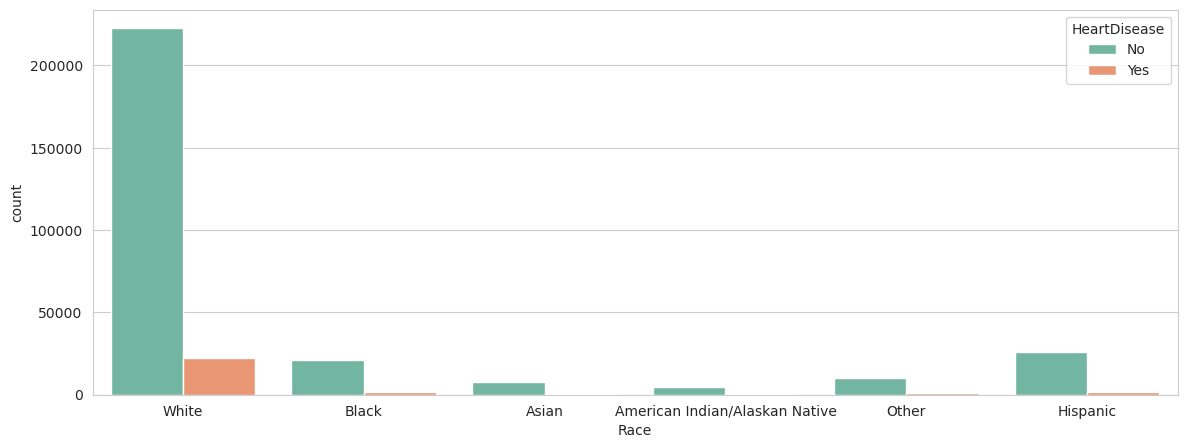

In [20]:
plt.figure(figsize=(14,5))
sns.countplot(x=df["Race"],hue=df["HeartDisease"],palette="Set2")

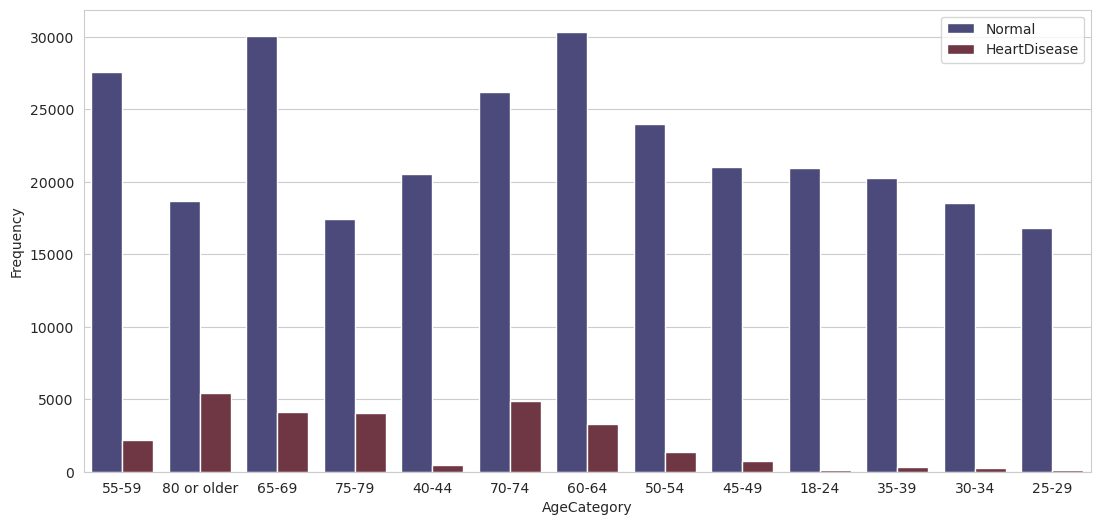

In [21]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'icefire')
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()



    We can see that people who are 80 or older are more likely to get HeartDiseases.



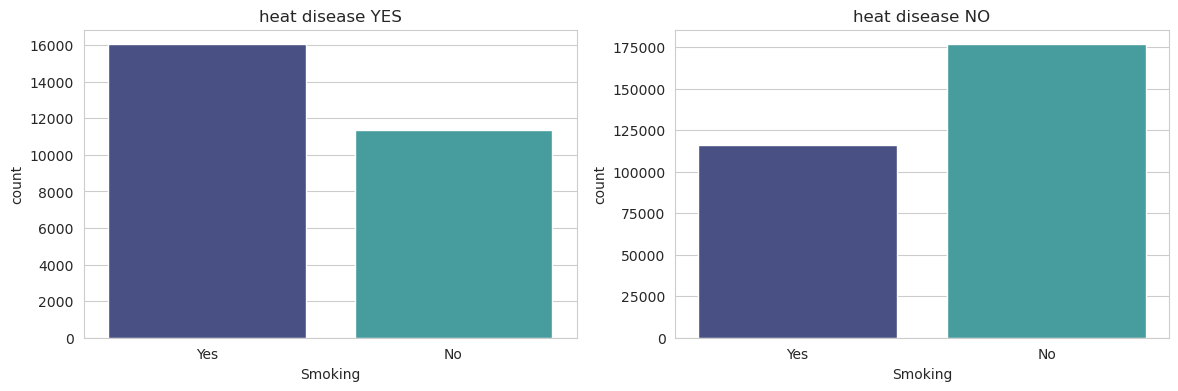

In [22]:
plot("Smoking")

<AxesSubplot:xlabel='Smoking', ylabel='count'>

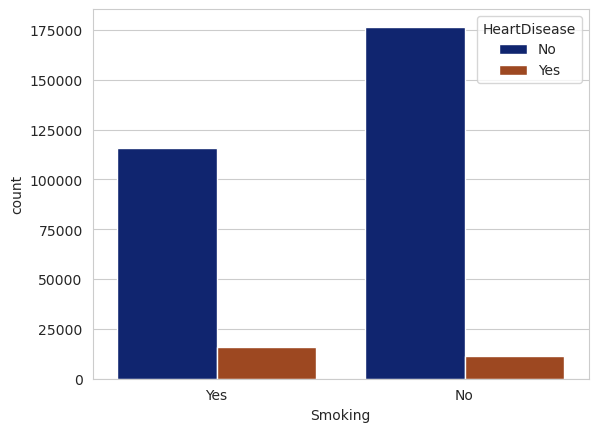

In [23]:
sns.countplot(x=df["Smoking"],hue=df["HeartDisease"])



- For smokers, they are the largest group that suffers from heart disease.
- There are also cases of heart disease, although they don't smoke, this is related to other factors.



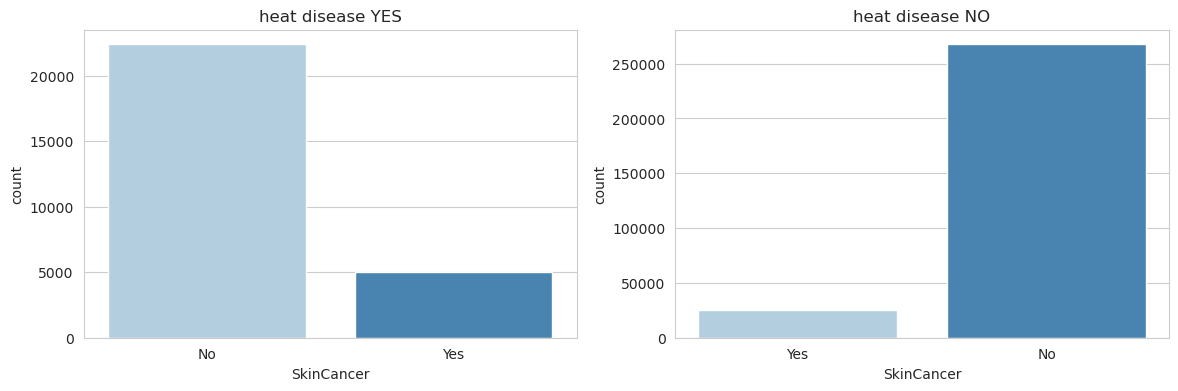

In [24]:
plot("SkinCancer","Blues")

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

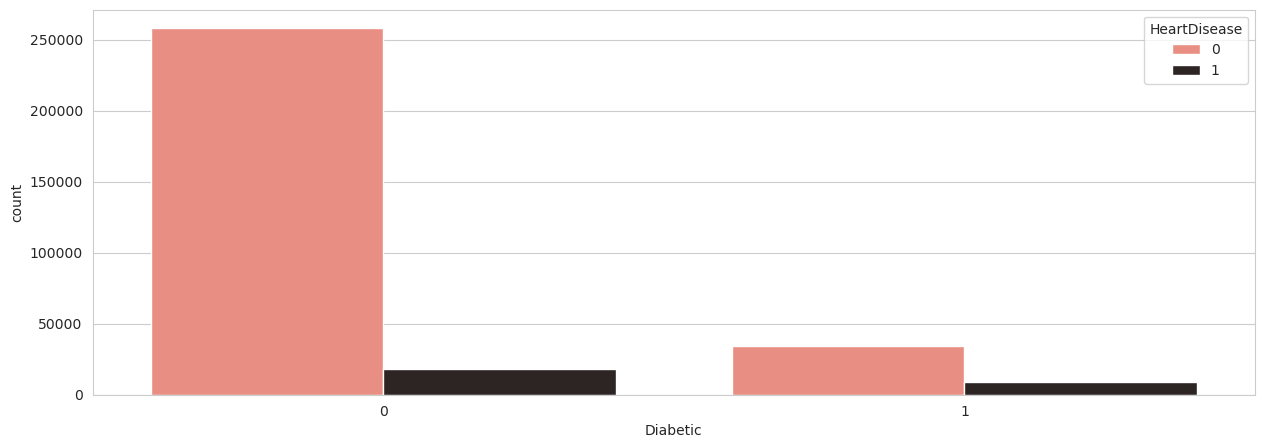

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x=df2["Diabetic"],hue=df2["HeartDisease"],palette="dark:salmon_r")

## check balance in dataset

In [26]:
df2["HeartDisease"].value_counts()/df2.shape[0]

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

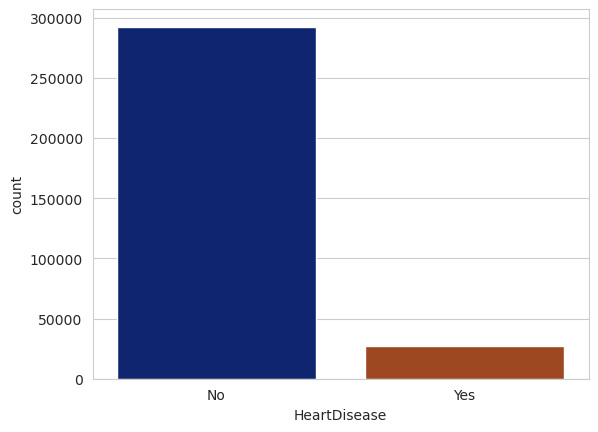

In [27]:
sns.countplot(x=df["HeartDisease"])

[]

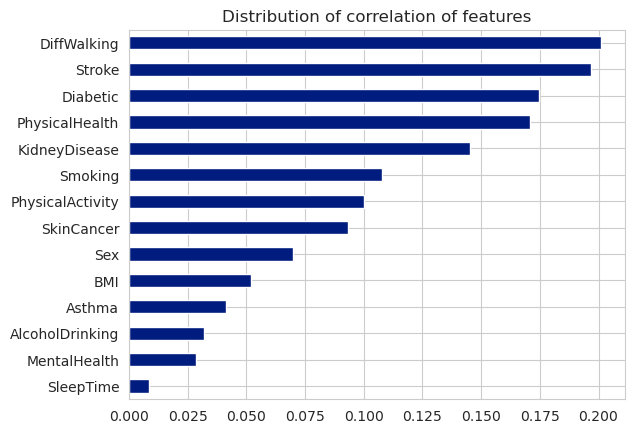

In [28]:
correlation = df2.corr()['HeartDisease']
plt.title('Distribution of correlation of features')
abs(correlation).sort_values()[:-1].plot.barh()
plt.plot()

In [29]:
X=df2.drop("HeartDisease",axis=1)
y=df2["HeartDisease"]
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)
(X_train.shape,X_test.shape)

((271825, 17), (47970, 17))

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [33]:
def modeling(X_test,y_test,y_train,X_train,model):
    from sklearn import metrics
    step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),["AgeCategory","GenHealth","Race"])],remainder='passthrough')
    step2=StandardScaler()
    step3=model
    pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
    ])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    R2_score=pipe.score(X_test,y_test)
    #X_train=step1.fit_transform(X_train)
    cv_score=np.mean(cross_val_score(pipe,X_train,y_train,cv=5))
    # Calculate accuracy, precision, recall, f1-score, and kappa score
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    X_test=step1.fit_transform(X_test)
    X_test=step2.fit_transform(X_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm=metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt="d")

    return R2_score,cv_score,prec,rec,f1,auc

# Logistic Regression	

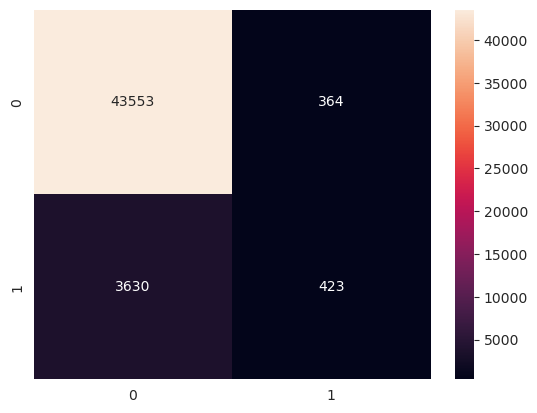

In [34]:
from sklearn.linear_model import LogisticRegression
y=[modeling(X_test,y_test,y_train,X_train,LogisticRegression())]


In [35]:
result=pd.DataFrame(y,columns=['R2 Score','Cross Validated R2 Score',"precision","recall","F1","AUC"])
result.insert(0,"model","Logistic Regression")
result

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.91674,0.915692,0.537484,0.104367,0.174793,0.843181


# Naive Bayes

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.916740,0.915692,0.537484,0.104367,0.174793,0.843181
0,Naive Bayes,0.745758,0.744225,0.210769,0.732050,0.327303,0.812843


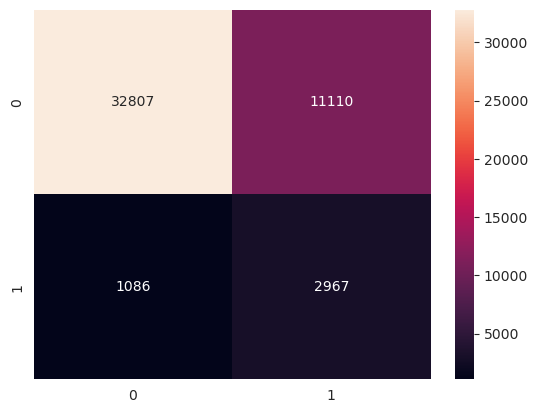

In [36]:
from sklearn.naive_bayes import GaussianNB
y=[modeling(X_test,y_test,y_train,X_train,GaussianNB())]
d=pd.DataFrame(y,columns=['R2 Score','Cross Validated R2 Score',"precision","recall","F1","AUC"])
d.insert(0,"model","Naive Bayes")
result=pd.concat([result,d],axis=0)
result

# Decision Tree

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.916740,0.915692,0.537484,0.104367,0.174793,0.843181
0,Naive Bayes,0.745758,0.744225,0.210769,0.732050,0.327303,0.812843
0,Decision Tree,0.915405,0.914622,0.495812,0.073032,0.127312,0.808818


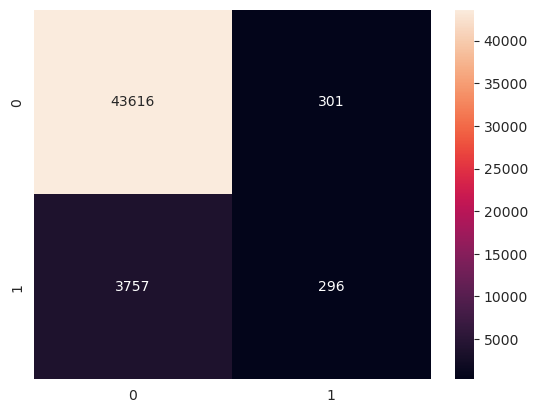

In [37]:
from sklearn.tree import DecisionTreeClassifier
y=[modeling(X_test,y_test,y_train,X_train,DecisionTreeClassifier(max_depth=8))]
d=pd.DataFrame(y,columns=['R2 Score','Cross Validated R2 Score',"precision","recall","F1","AUC"])
d.insert(0,"model","Decision Tree")
result=pd.concat([result,d],axis=0)
result

# Random Forest

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.916740,0.915692,0.537484,0.104367,0.174793,0.843181
0,Naive Bayes,0.745758,0.744225,0.210769,0.732050,0.327303,0.812843
0,Decision Tree,0.915405,0.914622,0.495812,0.073032,0.127312,0.808818
0,Random Forest,0.915989,0.914618,0.744681,0.008636,0.017073,0.821197


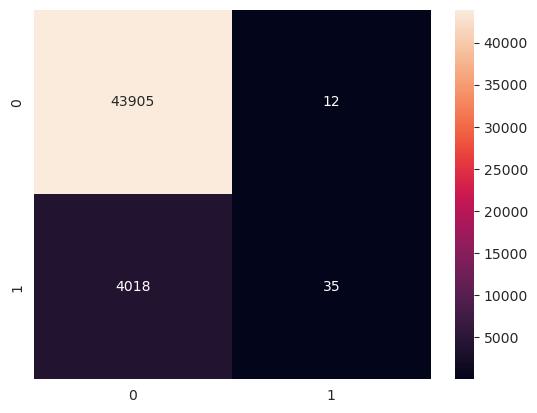

In [39]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
y=[modeling(X_test,y_test,y_train,X_train,RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8))]
d=pd.DataFrame(y,columns=['R2 Score','Cross Validated R2 Score',"precision","recall","F1","AUC"])
d.insert(0,"model","Random Forest")
result=pd.concat([result,d],axis=0)
result

# Adaboost

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.916740,0.915692,0.537484,0.104367,0.174793,0.843181
0,Naive Bayes,0.745758,0.744225,0.210769,0.732050,0.327303,0.812843
0,Decision Tree,0.915405,0.914622,0.495812,0.073032,0.127312,0.808818
0,Random Forest,0.915989,0.914618,0.744681,0.008636,0.017073,0.821197
0,Adaboost,0.916093,0.915412,0.514831,0.119911,0.194517,0.841159


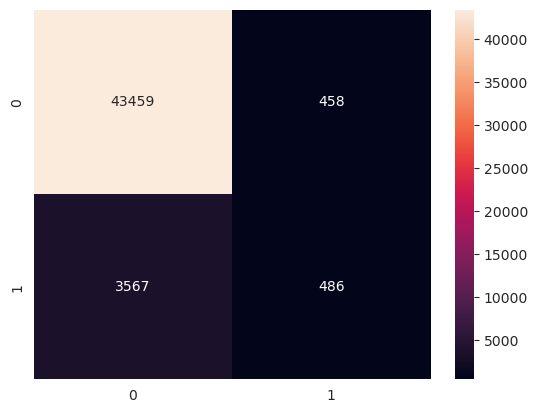

In [40]:
from sklearn.ensemble import AdaBoostClassifier

y=[modeling(X_test,y_test,y_train,X_train,AdaBoostClassifier(n_estimators=50,learning_rate=1.0))]
d=pd.DataFrame(y,columns=['R2 Score','Cross Validated R2 Score',"precision","recall","F1","AUC"])
d.insert(0,"model","Adaboost")
result=pd.concat([result,d],axis=0)
result

# XGBoost

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.916740,0.915692,0.537484,0.104367,0.174793,0.843181
0,Naive Bayes,0.745758,0.744225,0.210769,0.732050,0.327303,0.812843
0,Decision Tree,0.915405,0.914622,0.495812,0.073032,0.127312,0.808818
0,Random Forest,0.915989,0.914618,0.744681,0.008636,0.017073,0.821197
0,Adaboost,0.916093,0.915412,0.514831,0.119911,0.194517,0.841159
0,XGBboost,0.916052,0.914875,0.516291,0.101653,0.169862,0.841685


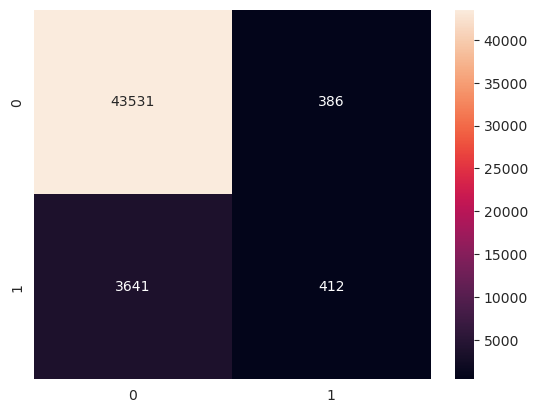

In [41]:
from xgboost import XGBClassifier
y=[modeling(X_test,y_test,y_train,X_train,XGBClassifier(n_estimators=50,max_depth=5,learning_rate=0.5))]
d=pd.DataFrame(y,columns=['R2 Score','Cross Validated R2 Score',"precision","recall","F1","AUC"])
d.insert(0,"model","XGBboost")
result=pd.concat([result,d],axis=0)
result

In [42]:
result=result.reset_index().drop("index",axis=1)
result

,model,R2 Score,Cross Validated R2 Score,precision,recall,F1,AUC
0,Logistic Regression,0.916740,0.915692,0.537484,0.104367,0.174793,0.843181
1,Naive Bayes,0.745758,0.744225,0.210769,0.732050,0.327303,0.812843
2,Decision Tree,0.915405,0.914622,0.495812,0.073032,0.127312,0.808818
3,Random Forest,0.915989,0.914618,0.744681,0.008636,0.017073,0.821197
4,Adaboost,0.916093,0.915412,0.514831,0.119911,0.194517,0.841159
5,XGBboost,0.916052,0.914875,0.516291,0.101653,0.169862,0.841685
